In [24]:
import torch as t
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import torchvision as tv
import PIL.Image as Image

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [25]:
class LeafTrainDataset(Dataset):
    def __init__(self, images_dir, train_df, transform=None):
        self.images_dir = images_dir
        self.train_df = train_df
        self.transform = transform

    def __len__(self):
        return len(self.train_df)
    
    def __getitem__(self, idx):
        img_name = str(self.train_df.iloc[idx]['id']) + ".jpg"
        img_dir = os.path.join(self.images_dir, img_name)

        # image = Image.open(img_dir)
        img = tv.io.read_image(img_dir)
        label = self.train_df.iloc[idx]['species']

        if self.transform:
            img = self.transform(img)
        return img, label

class LeafTestDataset(Dataset):
    def __init__(self, images_dir, test_df, transform=None):
        self.images_dir = images_dir
        self.test_df = test_df
        self.transform = transform

    def __len__(self):
        return len(self.test_df)
    
    def __getitem__(self, idx):
        img_name = str(self.test_df.iloc[idx]['id']) + ".jpg"
        img_dir = os.path.join(self.images_dir, img_name)

        image = Image.open(img_dir)
        if self.transform:
            image = self.transform(image)
        return image

In [26]:
img_dir = '../../datasets/leaf-classification/images/'
train_csv_dir = '../../datasets/leaf-classification/train.csv'
test_csv_dir = '../../datasets/leaf-classification/test.csv'

img_filenames_list = os.listdir(img_dir)
train_df = pd.read_csv(train_csv_dir)
test_df = pd.read_csv(test_csv_dir)

In [27]:
transform = tv.transforms.Compose([
    tv.transforms.Resize((256, 256)),
    # tv.transforms.ToTensor(),
])

train_ds = LeafTrainDataset(img_dir, train_df, transform)
test_ds = LeafTestDataset(img_dir, test_df, transform)

train_dl = DataLoader(train_ds, batch_size=4, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=4, shuffle=True)

In [28]:
test_img, label = next(iter(train_dl))
test_img.shape

torch.Size([4, 1, 256, 256])

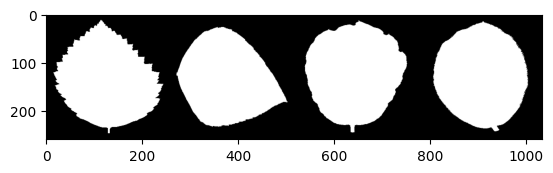

In [29]:
# make a grid from batch
out = tv.utils.make_grid(test_img)
plt.imshow(out.numpy().transpose((1, 2, 0)))